In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
%matplotlib inline

In [2]:
digits = pd.read_csv("train.csv")

In [3]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('test.csv')

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Trying something (added after the first 2 naive attempts)

In [50]:
def averaging(row):
    d = np.array(row).reshape((28,28))
    blur = np.zeros((28,28))
    for i in range(26):
        for j in range(26):
            blur[i,j] = sum(d[k,l] for k,l in zip(range(i-1,i+2),range(j-1,j+2)))/9
    return blur.flatten()

In [49]:
pixel_cols = ['pixel'+str(i) for i in range(784)]

In [ ]:
blurred_digits_array = pd.DataFrame(digits['label'])
blurred_digits_array[pixel_cols] = pd.DataFrame(digits.drop('label', axis=1).apply(averaging, axis=1).to_list(), columns=pixel_cols)
blurred_digits_array.head()

In [ ]:
blurred_digits_array.head()

In [ ]:
fig, axs = plt.subplots(2,5)
for ax in axs.flat:
    picID = np.random.randint(42000)
    d = np.array(blurred_digits_array.iloc[picID,1:]).reshape((28,28))
    ax.imshow(d, cmap='gray')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

X = blurred_digits_array.drop('label', axis=1)
y = blurred_digits_array['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print(classification_report(y_test, predictions))

In [ ]:
scores = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)

    X = blurred_digits_array.drop('label', axis=1)
    y = blurred_digits_array['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    knn.fit(X_train, y_train)

    predictions = knn.predict(X_test)
    
    score = accuracy_score(y_test, predictions)
    scores.append(score)

In [ ]:
plt.plot(range(1,20), scores)

In [ ]:
print(scores)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

X = blurred_digits_array.drop('label', axis=1)
y = blurred_digits_array['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

# print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
test.head()

In [ ]:
blurred_test = pd.DataFrame()
blurred_test[pixel_cols] = pd.DataFrame(test.apply(averaging, axis=1).to_list(), columns=pixel_cols)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

X = blurred_digits_array.drop('label', axis=1)
y = blurred_digits_array['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

knn.fit(X_train, y_train)

submission = knn.predict(blurred_test)

In [ ]:
submit = pd.DataFrame(submission, columns=['label'], index=range(1,len(submission)+1))

In [ ]:
submit.head()

In [ ]:
submit.to_csv('submit3.csv')

## Some EDA

In [ ]:
sns.countplot(data=digits, x='label')

In [ ]:
digits.describe()

In [ ]:
digits.info()

In [ ]:
fig, axs = plt.subplots(2,5)
for ax in axs.flat:
    picID = np.random.randint(42000)
    d = np.array(digits.iloc[picID,1:]).reshape((28,28))
    ax.imshow(d, cmap='gray')

In [ ]:
fig, axs = plt.subplots(1,5)
fig2, axs2 = plt.subplots(1,5)
for ax,ax2 in zip(axs.flat,axs2.flat):
    picID = np.random.randint(42000)
    d = np.array(digits.iloc[picID,1:]).reshape((28,28))
    smaller = np.zeros((28,28))
    for i in range(26):
        for j in range(26):
            smaller[i,j] = sum(d[k,l] for k,l in zip(range(i-2,i+3),range(j-2,j+3)))/25
    ax.imshow(d, cmap='gray')
    ax2.imshow(smaller, cmap='gray')

In [ ]:
wrongs = (i for i in range(len(predictions)) if y_test.to_numpy()[i]!=predictions[i])

fig, axs = plt.subplots(2,5)

for ax in axs.flat:
    picID = next(wrongs)
    ax.set_title(f'True:{y_test.to_numpy()[picID]}, Pred:{predictions[picID]}', fontsize=7)
    d = np.array(X_test.iloc[picID,:]).reshape((28,28))
    ax.imshow(d, cmap='gray')
    ax.axis('off')

## Second try

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
X = digits.drop('label', axis=1)
y = digits['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rfc.fit(X_train, y_train)

predictions = rfc.predict(X_test)

# print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

In [ ]:
scores = []
for depth in range(5, 100, 10):
    rfc = RandomForestClassifier(max_depth=depth)
    X = digits.drop('label', axis=1)
    y = digits['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    rfc.fit(X_train, y_train)
    predictions = rfc.predict(X_test)
    
    score = accuracy_score(y_test, predictions)
    scores.append(score)

In [ ]:
plt.plot(range(5, 100, 10), scores)

In [ ]:
depth = range(5,100,10)[1]

In [ ]:
rfc = RandomForestClassifier(max_depth=depth)
X = digits.drop('label', axis=1)
y = digits['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

print(classification_report(y_test, predictions))

In [ ]:
wrongs = (i for i in range(len(predictions)) if y_test.to_numpy()[i]!=predictions[i])

fig, axs = plt.subplots(2,5)

for ax in axs.flat:
    picID = next(wrongs)
    ax.set_title(f'True:{y_test.to_numpy()[picID]}, Pred:{predictions[picID]}', fontsize=7)
    d = np.array(X_test.iloc[picID,:]).reshape((28,28))
    ax.imshow(d, cmap='gray')
    ax.axis('off')

In [ ]:
depth = 15
rfc = RandomForestClassifier(max_depth=depth)
X = digits.drop('label', axis=1)
y = digits['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

rfc.fit(X_train, y_train)

submission = rfc.predict(test)

In [ ]:
submit = pd.DataFrame(submission, columns=['label'], index=range(1,len(submission)+1))

In [ ]:
submit.head()

In [ ]:
submit.to_csv('submit2.csv')

## Third

In [29]:
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import GridSearchCV

### Without Gridsearch

In [ ]:
X = digits.drop('label', axis=1)
y = digits['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)

In [ ]:
predictions = svc.predict(X_test)

print(classification_report(y_test, predictions))

In [ ]:
X = digits.drop('label', axis=1)
y = digits['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

svc.fit(X_train, y_train)

submission = svc.predict(test)

In [ ]:
submit = pd.DataFrame(submission, columns=['label'], index=range(1,len(submission)+1))

In [ ]:
submit.to_csv('submit4.csv')

### With Gridsearch

In [ ]:
X = digits.drop('label', axis=1)
y = digits['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

In [ ]:
grid.best_estimator_

In [ ]:
predictions = grid.predict(X_test)

print(classification_report(y_test, predictions))

## Another Try

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(digits.drop('label',axis=1))

In [ ]:
scaled_digits = scaler.transform(digits.drop('label', axis=1))

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_digits)
# pca.fit(digits)

In [ ]:
x_pca = pca.transform(scaled_digits)
# x_pca = pca.transform(digits)

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=digits['label'],s=5,cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
pca = PCA(n_components=30)
pca.fit(scaled_digits)
x_pca = pca.transform(scaled_digits)

In [ ]:
# pd.DataFrame(scaled_digits)

In [ ]:
digits_pca = pd.concat([digits['label'],pd.DataFrame(x_pca)],axis=1)

In [ ]:
digits_pca.describe()

In [ ]:
X = digits_pca.drop('label', axis=1)
y = digits_pca['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)

In [ ]:
predictions = svc.predict(X_test)

print(classification_report(y_test, predictions))

In [ ]:
# accuracies = []
# for k in range(30,100,10):
#     pca = PCA(n_components=k)
#     pca.fit(scaled_digits)
#     x_pca = pca.transform(scaled_digits)

#     digits_pca = pd.concat([digits['label'],pd.DataFrame(x_pca)],axis=1)

#     X = digits_pca.drop('label', axis=1)
#     y = digits_pca['label']
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#     svc = SVC()
#     svc.fit(X_train,y_train)

#     predictions = svc.predict(X_test)

#     accuracies.append(accuracy_score(y_test, predictions))
# print(accuracies)

In [ ]:
X = digits_pca.drop('label', axis=1)
y = digits['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

svc.fit(X_train, y_train)

scaled_test = scaler.transform(test)
pca_test = pd.DataFrame(pca.transform(scaled_test))

In [ ]:
pca_test.head()

In [ ]:
submission = svc.predict(pca_test)

In [ ]:
submit = pd.DataFrame(submission, columns=['label'], index=range(1,len(submission)+1))

In [ ]:
submit.to_csv('submit5.csv')

## And Another

In [7]:
from scipy.ndimage import interpolation
import scipy as sp
import math

In [15]:
# Taken From https://fsix.github.io/mnist/Deskewing.html

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    img = interpolation.affine_transform(image,affine,offset=offset)
    return (img - img.min()) / (img.max() - img.min())

def mydeskew(row):
    image = np.array(row).reshape((28,28))
    return deskew(image).flatten()

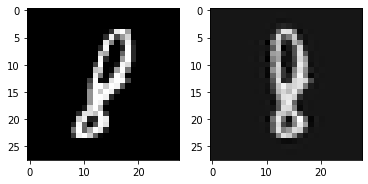

In [9]:
fig, axs = plt.subplots(1,2)
picID = np.random.randint(42000)
d = np.array(digits.iloc[picID,1:]).reshape((28,28))
axs[0].imshow(d, cmap='gray')
axs[1].imshow(deskew(d), cmap='gray')

### Preprocessing

In [11]:
pixel_cols = ['pixel'+str(i) for i in range(784)]

In [16]:
deskewed_digits_array = pd.DataFrame(digits['label'])
deskewed_digits_array[pixel_cols] = pd.DataFrame(digits.drop('label', axis=1).apply(mydeskew, axis=1).to_list(), columns=pixel_cols)
deskewed_digits_array.head()

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0.090604,0.090604,0.090604,0.090604,0.090604,0.090604,0.090604,0.090604,0.090604,...,0.087248,0.090604,0.090604,0.090604,0.090604,0.090604,0.090604,0.090604,0.090604,0.090604
1,0,0.070968,0.070968,0.070968,0.070968,0.070968,0.070968,0.070968,0.070968,0.070968,...,0.070968,0.070968,0.070968,0.070968,0.070968,0.070968,0.070968,0.070968,0.070968,0.070968
2,1,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765,...,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765,0.098765
3,4,0.105263,0.105263,0.105263,0.105263,0.105263,0.105263,0.105263,0.105263,0.105263,...,0.105263,0.105263,0.105263,0.105263,0.105263,0.105263,0.105263,0.105263,0.105263,0.105263
4,0,0.089744,0.089744,0.089744,0.089744,0.089744,0.089744,0.089744,0.089744,0.089744,...,0.089744,0.089744,0.089744,0.089744,0.089744,0.089744,0.089744,0.089744,0.089744,0.089744


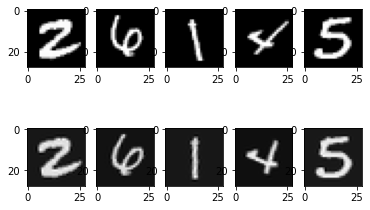

In [28]:
fig, axs = plt.subplots(2,5)
for i in range(5):
    picID = np.random.randint(42000)
    img = np.array(digits.iloc[picID,1:]).reshape((28,28))
    desked_img = np.array(deskewed_digits_array.iloc[picID,1:]).reshape((28,28))
    axs[0,i].imshow(img, cmap='gray')
    axs[1,i].imshow(desked_img, cmap='gray')

In [30]:
X = deskewed_digits_array.drop('label', axis=1)
y = deskewed_digits_array['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [32]:
predictions = svc.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1219
           1       0.99      0.99      0.99      1403
           2       0.98      0.99      0.99      1271
           3       0.98      0.98      0.98      1308
           4       0.98      0.99      0.98      1243
           5       0.98      0.98      0.98      1144
           6       0.99      0.99      0.99      1276
           7       0.99      0.98      0.98      1281
           8       0.98      0.98      0.98      1219
           9       0.98      0.96      0.97      1236

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



In [33]:
X = deskewed_digits_array.drop('label', axis=1)
y = deskewed_digits_array['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

svc.fit(X_train, y_train)

In [38]:
deskewed_test = pd.DataFrame(test.apply(mydeskew, axis=1).to_list(), columns=pixel_cols)
deskewed_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.073090,0.073090,0.073090,0.073090,0.073090,0.073090,0.073090,0.073090,0.073090,0.073090,...,0.073090,0.073090,0.073090,0.073090,0.073090,0.073090,0.073090,0.073090,0.073090,0.073090
1,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,...,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647,0.117647
2,0.075812,0.075812,0.075812,0.075812,0.075812,0.075812,0.075812,0.075812,0.075812,0.075812,...,0.075812,0.075812,0.075812,0.075812,0.075812,0.075812,0.075812,0.075812,0.075812,0.075812
3,0.081571,0.081571,0.081571,0.081571,0.081571,0.081571,0.081571,0.081571,0.081571,0.081571,...,0.081571,0.081571,0.081571,0.081571,0.081571,0.081571,0.081571,0.081571,0.081571,0.081571
4,0.083871,0.083871,0.083871,0.083871,0.083871,0.083871,0.083871,0.083871,0.083871,0.083871,...,0.083871,0.083871,0.083871,0.083871,0.083871,0.083871,0.083871,0.083871,0.083871,0.083871


In [37]:
submission = svc.predict(deskewed_test)

In [39]:
submit = pd.DataFrame(submission, columns=['label'], index=range(1,len(submission)+1))

In [40]:
submit.to_csv('submit6.csv')

## Maybe I can squeeze it more

In [51]:
blurred_digits = pd.DataFrame(digits['label'])
blurred_digits[pixel_cols] = pd.DataFrame(deskewed_digits_array.drop('label', axis=1).apply(averaging, axis=1).to_list(), columns=pixel_cols)
blurred_digits.head()

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0.030201,0.030201,0.030201,0.030201,0.030201,0.030201,0.030201,0.030201,0.030201,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.023656,0.023656,0.023656,0.023656,0.023656,0.023656,0.023656,0.023656,0.023656,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.032922,0.032922,0.032922,0.032922,0.032922,0.032922,0.032922,0.032922,0.032922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,0.035088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.029915,0.029915,0.029915,0.029915,0.029915,0.029915,0.029915,0.029915,0.029915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


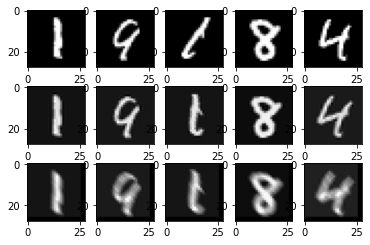

In [54]:
fig, axs = plt.subplots(3,5)
for i in range(5):
    picID = np.random.randint(42000)
    img = np.array(digits.iloc[picID,1:]).reshape((28,28))
    desked_img = np.array(deskewed_digits_array.iloc[picID,1:]).reshape((28,28))
    blurred_img = np.array(blurred_digits.iloc[picID,1:]).reshape((28,28))
    axs[0,i].imshow(img, cmap='gray')
    axs[1,i].imshow(desked_img, cmap='gray')
    axs[2,i].imshow(blurred_img, cmap='gray')

In [55]:
X = blurred_digits.drop('label', axis=1)
y = blurred_digits['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [57]:
predictions = svc.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1230
           1       0.99      0.99      0.99      1409
           2       0.97      0.98      0.97      1284
           3       0.98      0.97      0.98      1315
           4       0.96      0.97      0.97      1215
           5       0.97      0.98      0.98      1114
           6       0.99      0.99      0.99      1247
           7       0.98      0.97      0.98      1286
           8       0.97      0.98      0.98      1225
           9       0.97      0.96      0.96      1275

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



In [58]:
X = blurred_digits.drop('label', axis=1)
y = blurred_digits['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

svc.fit(X_train, y_train)

SVC()

In [63]:
deskewed_test = pd.DataFrame(test.apply(mydeskew, axis=1).to_list(), columns=pixel_cols)
blurred_test = pd.DataFrame(deskewed_test.apply(averaging, axis=1).to_list(), columns=pixel_cols)
blurred_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.024363,0.024363,0.024363,0.024363,0.024363,0.024363,0.024363,0.024363,0.024363,0.024363,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,0.039216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.025271,0.025271,0.025271,0.025271,0.025271,0.025271,0.025271,0.025271,0.025271,0.025271,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.027190,0.027190,0.027190,0.027190,0.027190,0.027190,0.027190,0.027190,0.027190,0.027190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.027957,0.027957,0.027957,0.027957,0.027957,0.027957,0.027957,0.027957,0.027957,0.028315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
submission = svc.predict(blurred_test)

In [65]:
submit = pd.DataFrame(submission, columns=['label'], index=range(1,len(submission)+1))

In [66]:
submit.to_csv('submit8.csv')